In [1]:
from prolint2 import Universe

In [2]:
from prolint2.sampledata import GIRKDataSample
GIRK = GIRKDataSample()
u = Universe(GIRK.coordinates, GIRK.trajectory)

In [3]:
contacts = u.compute_contacts(cutoff=7)

  0%|          | 0/1251 [00:00<?, ?it/s]

In [4]:
u.query.residues.resids

array([   1,    2,    3, ..., 1282, 1283, 1284])

In [5]:
from prolint2.metrics.metrics import Metric, MeanMetric, SumMetric, MaxMetric

mean_instance = MeanMetric()
metric_instance = Metric(contacts, mean_instance)
mean_contacts = metric_instance.compute()

#### Point distributions

In [6]:
# from prolint2.plotting.plotting import PointDistribution
# PD = PointDistribution(u, mean_contacts, lipid='CHOL', metric_name='MeanMetric', fig_size=(8, 5))
# PD.save_plot(linewidth=0.24, palette='flare')

In [7]:
# PD.generate_script(PointDistribution, "point_distribution.py")

#### Radar Plot

In [8]:
# from prolint2.plotting.plotting import Radar
# metric_instances_list = [MeanMetric(), SumMetric(), MaxMetric()]
# metric_instance = Metric(contacts, metric_instances_list) # clear is True by default so we clear any existing metrics
# contacts_out = metric_instance.compute() # populate the metric columns

# RAD = Radar(contacts_out, resIDs=[2, 3, 5], lipid='POPS', metric_names=['MeanMetric', 'SumMetric', 'MaxMetric'], fig_size=(6, 6))
# RAD.save_plot(marker='o', markersize=3, linewidth=2, alpha=0.7)

In [9]:
# RAD.generate_script(Radar, "radar.py")

#### Density map

In [10]:
# from prolint2.plotting.plotting import DensityMap

# Dens = DensityMap(u, lipid='CHOL', fig_size=(10, 10))
# Dens.save_plot(interpolation='nearest', cmap='viridis')

In [11]:
# Dens.generate_script(DensityMap, 'plot_2d.py')

#### 3D Projection

In [12]:
# from prolint2.plotting.projection import show_contact_projection
# from prolint2.metrics.metrics import Metric, MeanMetric, SumMetric, MaxMetric 

# mean_instance = MaxMetric()
# metric_instance = Metric(contacts, mean_instance)
# mean_contacts = metric_instance.compute()
    
# view, color_squeme = show_contact_projection(u, mean_contacts, metric_name='MaxMetric', lipid='POPS', query_repr='surface', database_repr='spacefill', cmap='Blues', frame_idx=0)

In [13]:
# def edit_view(view):
#     view.clear_representations(component=1)
#     view.add_representation("spacefill", component=1, selection='CHOL', color='blue')
#     view.clear_representations(component=0)
#     view.add_representation("surface", surfaceType="av", probeRadius=2.1, component=0, color=color_squeme, opacity=0.5)
#     view.add_representation("cartoon", component=0)
#     return view

In [14]:
# edited_view = edit_view(view)

In [15]:
# edited_view

#### Lipid contact durations

In [16]:
from prolint2.plotting.plotting import DurationGantt

DG = DurationGantt(u, contacts, 'POPE')

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [17]:
DG.get_lipid_contact_durations(frequency_filter=0.1)

In [18]:
DG.lipid_frequencies

,Lipip ID,Frequency
0,2329,7.8816
1,1536,5.4312
2,1515,4.8664
3,2317,4.5816
4,1434,3.7616
...,...,...
258,2319,0.1048
259,2490,0.1040
260,1455,0.1040
261,1488,0.1024


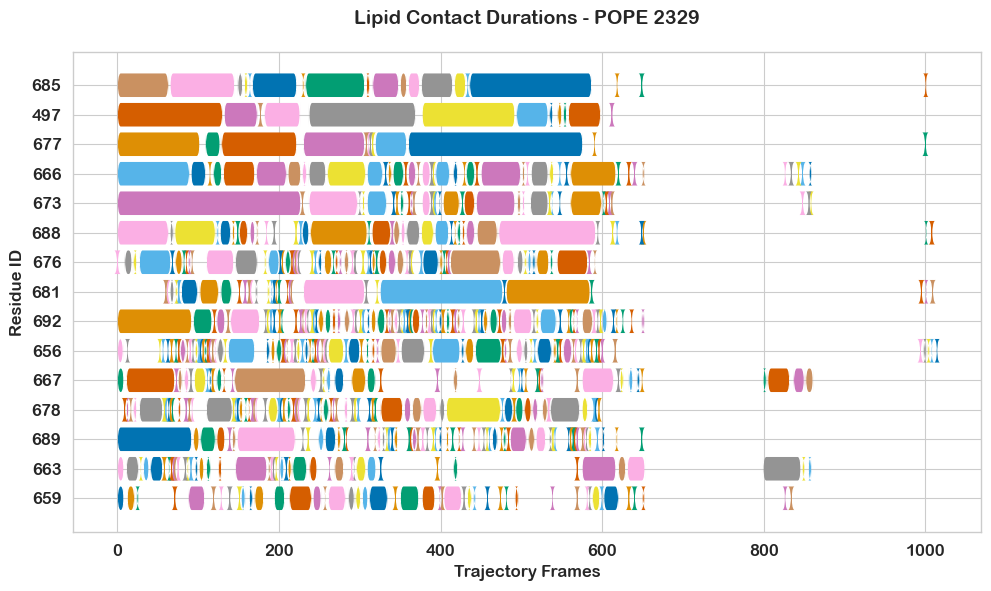

In [19]:
DG.save_plot(lipid_id = 2329, top_filter=15)

#### Sequence logo

In [20]:
# import logomaker as lm

# # create a Logo object
# from prolint2.plotting.utils import create_logo_df

# df = create_logo_df(u, mean_contacts, lipid='POPS', metric_name='MeanMetric')


In [21]:
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# from mpl_toolkits.axes_grid1 import make_axes_locatable

# df = df.head(75)
# # ''.join(df['Resname'].to_list())
# mat_df = lm.sequence_to_matrix(''.join(df['Resname'].to_list()))

# fig, ax = plt.subplots(1,1,figsize=[10,2.4])

# # create colormap based on Metric
# cmap = mpl.cm.get_cmap('Blues')
# norm = mpl.colors.Normalize(vmin=df['Metric'].min(), vmax=df['Metric'].max())
# colors = [cmap(norm(value)) for value in df['Metric']]
# # colors

# ww_logo = lm.Logo(mat_df, ax=ax, color_scheme='silver', vpad=.4)  #gainsboro
# # remove xyaxis
# ww_logo.ax.set_yticks([])

# for residx, metric in enumerate(df['Metric']):
#     # if metric > 0.000000001:
#     ww_logo.highlight_position(p=residx, color=list(colors[residx][:3]), alpha=1)
# ww_logo.style_spines(visible=False)
# plt.grid(False)
# # show all xticks
# plt.xticks(range(0, len(df['Resname']), 5), df['ResID'][::5], rotation=90)

# # add color bar to the right
# divider = make_axes_locatable(ww_logo.ax)
# cax = divider.append_axes("bottom", size="25%", pad=0.8)
# cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ww_logo.ax, cax=cax, orientation='horizontal', location='bottom', ticks=[df['Metric'].min(), df['Metric'].max()])
# cbar.set_label(label='Metric', size=12)
# cbar.ax.tick_params(labelsize=12)

# # size of the x-axis labels
# # ax.set_xticks(fontsize=12)
# ax.tick_params(axis='x', which='major', labelsize=12)
# ax.set_xlabel('Residue ID', fontsize=12)

# ww_logo.ax.set_title('Logo based on {}'.format('MeanMetric'), fontsize=12, weight="bold", pad=20)
# plt.tight_layout()
# plt.savefig('logo.png', dpi=300, bbox_inches='tight')

In [22]:
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import math

# df = df.head(300)
# mat_df = lm.sequence_to_matrix(''.join(df['Resname'].to_list()))

# def ceildiv(number):
#     if number % 75 == 0:
#         return number // 75
#     else:
#         return number // 75 + 1
    
# n_rows = ceildiv(len(df['Resname']))

# fig, axs = plt.subplots(n_rows, figsize=[10,(n_rows*0.75) + 0.4])

# # create colormap based on Metric
# cmap = mpl.cm.get_cmap('Blues')
# norm = mpl.colors.Normalize(vmin=df['Metric'].min(), vmax=df['Metric'].max())
# colors = [cmap(norm(value)) for value in df['Metric']]
# # colors
# if n_rows == 1:
#     ww_logo = lm.Logo(mat_df, ax=axs, color_scheme='silver', vpad=.4, font_name='Arial Rounded MT Bold') 
#     for residx, metric in enumerate(df['Metric']):
#         ww_logo.highlight_position(p=residx, color=list(colors[residx][:3]), alpha=1)
#     ww_logo.style_spines(visible=False)

#     plt.xticks(range(0, len(df['Resname']), 5), df['ResID'][::5], rotation=0)
#     axs.tick_params(axis='x', which='major', labelsize=12)
#     axs.set_yticks([])
#     axs.grid(False)
# else:
#     magic_number = math.ceil(len(df['Resname'])/n_rows)
#     for i in range(n_rows):
#         if i == n_rows - 1:
#             ww_logo = lm.Logo(mat_df[i*magic_number:], ax=axs[i], color_scheme='silver', vpad=.4, font_name='Arial Rounded MT Bold')  
#             ww_logo.ax.set_xticks(range(i*magic_number, len(df['Resname']), 5), df['ResID'][i*magic_number::5], rotation=0)
#         else:
#             ww_logo = lm.Logo(mat_df[i*magic_number:(i+1)*magic_number], ax=axs[i], color_scheme='silver', vpad=.4, font_name='Arial Rounded MT Bold')  
#             ww_logo.ax.set_xticks(range(i*magic_number, (i+1)*magic_number, 5), df['ResID'][i*magic_number:(i+1)*magic_number:5], rotation=0)

#         for residx, metric in enumerate(df['Metric']):
#             ww_logo.highlight_position(p=residx, color=list(colors[residx][:3]), alpha=1)
#         ww_logo.style_spines(visible=False)

#     for ax in axs.flat:
#         ax.tick_params(axis='x', which='major', labelsize=12)
#         ax.set_yticks([])
#         ax.grid(False)

# # add unique xlabel
# fig.text(0.5, -0.04, 'Residue ID', ha='center', fontsize=12, fontfamily='Arial Rounded MT Bold')

# # # add color bar to the bottom
# cax = plt.axes([0.1, -0.15, 0.8, 0.05])
# cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation='horizontal', ticks=[df['Metric'].min(), df['Metric'].max()/2, df['Metric'].max()])
# cbar.set_label(label='MeanMetric', size=12, fontfamily='Arial Rounded MT Bold')
# cbar.ax.tick_params(labelsize=12)

# fig.suptitle('Logo based on {}'.format('MeanMetric'), fontsize=14, weight="bold", fontfamily='Arial Rounded MT Bold')
# plt.tight_layout()
# plt.savefig('logo.png', dpi=300, bbox_inches='tight')

In [23]:
# from prolint2.plotting.plotting import LogoResidues

# LR = LogoResidues(u, mean_contacts, lipid_type='POPS', metric_name='MeanMetric')
# LR.save_plot()